<a href="https://colab.research.google.com/github/Shrey-Viradiya/HandsOnMachineLearning/blob/master/Deep_Computer_Vision_using_Convolution_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Computer Vision using Convolution Neural Network

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [0]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [0]:
from sklearn.datasets import load_sample_image
import numpy as np

In [0]:
china = load_sample_image('china.jpg')/255
flower = load_sample_image('flower.jpg')/255
images = np.array([china, flower])
batch_size , height, width, channels = images.shape

In [0]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [0]:
outputs = tf.nn.conv2d(images, filters, strides= 1, padding='SAME')

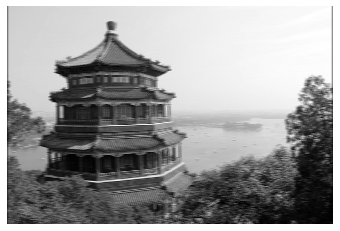

In [7]:
plot_image(outputs[0, :, :, 1])

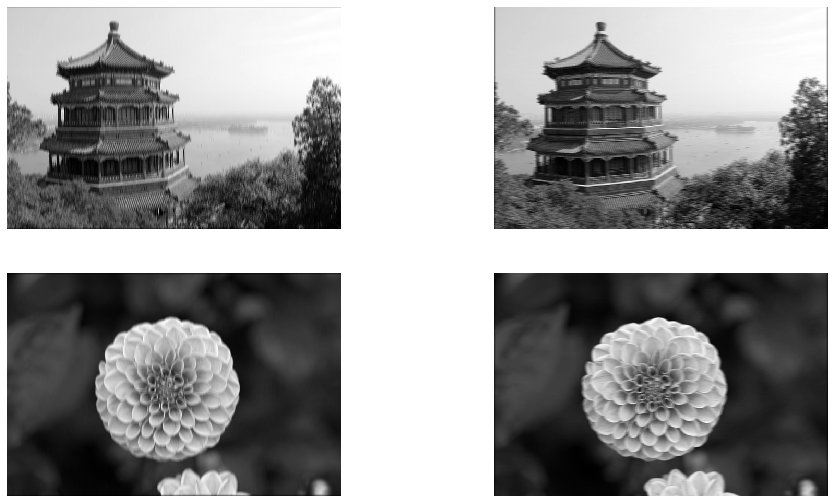

In [8]:
plt.figure(figsize = (16,9))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

## Pooling layer

### Max pooling

In [0]:
max_pool = keras.layers.MaxPool2D(pool_size=2)

In [10]:
output = max_pool(images)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [11]:
images.shape

(2, 427, 640, 3)

In [12]:
output.shape

TensorShape([2, 213, 320, 3])

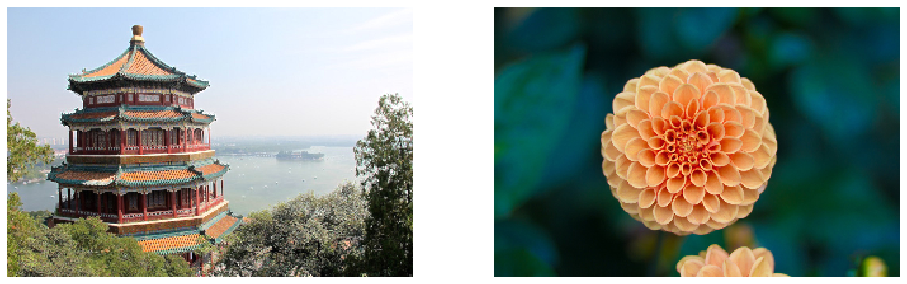

In [13]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plot_color_image(output[0,:,:,:])
plt.subplot(122)
plot_color_image(output[1,:,:,:])